In [1]:
import sys
sys.path.insert(0, '../../../network')

In [2]:
import logging
import argparse
import numpy as np
from network import Population, RateNetwork
from learning import ReachingTask
from transfer_functions import ErrorFunction
from connectivity import SparseConnectivity, LinearSynapse, ThresholdPlasticityRule
from sequences import GaussianSequence
import matplotlib.pyplot as plt
import seaborn as sns
logging.basicConfig(level=logging.INFO)

In [3]:
phi = ErrorFunction(mu=0.22, sigma=0.1).phi
ctx = Population(N=1000, tau=1e-2, phi=phi, name='ctx')
bg = Population(N=1000, tau=1e-2, phi=phi, name='bg')
plasticity = ThresholdPlasticityRule(x_f=0.5, q_f=0.8) 

S, P = 1, 3
sequences_ctx = [GaussianSequence(P,ctx.size, seed=5) for i in range(S)]
patterns_ctx = np.stack([s.inputs for s in sequences_ctx])
sequences_bg = [GaussianSequence(P,ctx.size, seed=27) for i in range(S)]
patterns_bg = np.stack([s.inputs for s in sequences_bg])

J_cc = SparseConnectivity(source=ctx, target=ctx, p=0.05)
synapse_cc = LinearSynapse(J_cc.K, A=5)
J_cc.store_attractors(patterns_ctx[0], patterns_ctx[0], synapse_cc.h_EE, 
                      plasticity.f, plasticity.g)
J_bb = SparseConnectivity(source=bg, target=bg, p=0.05)
synapse_bb = LinearSynapse(J_bb.K, A=5)
J_bb.store_attractors(patterns_bg[0], patterns_bg[0], synapse_bb.h_EE, 
                      plasticity.f, plasticity.g)
J_cb  = SparseConnectivity(source=bg, target=ctx, p=0.05)
synapse_cb = LinearSynapse(J_cb.K, A=1.5)
J_cb.store_attractors(patterns_bg[0], patterns_ctx[0], synapse_cb.h_EE, 
                      plasticity.f, plasticity.g)

J_bc = SparseConnectivity(source=ctx, target=bg, p=0.05)
synapse_bc = LinearSynapse(J_bc.K, A=0)
J_bc.store_sequences(patterns_ctx, patterns_bg, synapse_bc.h_EE, plasticity.f, plasticity.g)
net_ctx = RateNetwork(ctx, c_EE=J_cc, c_IE=J_bc, formulation=4)
net_bg = RateNetwork(bg, c_II=J_bb, c_EI=J_cb, formulation=4)

INFO:connectivity:Building connections from ctx to ctx
INFO:connectivity:Storing attractors
100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 31173.52it/s]
INFO:connectivity:Building connections from bg to bg
INFO:connectivity:Storing attractors
100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 32707.95it/s]
INFO:connectivity:Building connections from bg to ctx
INFO:connectivity:Storing attractors
100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 34153.90it/s]
INFO:connectivity:Building connections from ctx to bg
INFO:connectivity:Storing sequences
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 31.58it/s]
INFO:connectivity:Applying synaptic transfer function
INFO:connectivity:Building sparse matrix


In [4]:
# init_input_ctx = np.random.RandomState().normal(0,1,size=patterns_ctx[0][0].shape)
# init_input_bg = np.random.RandomState().normal(0,1,size=patterns_bg[0][0].shape)
init_input_ctx = patterns_ctx[0][0]
init_input_bg = patterns_bg[0][0]
T=2
mouse = ReachingTask(3, alpha=0.5)
net_ctx.simulate_learning(mouse, net_bg, T, init_input_ctx, init_input_bg, 
                          phi(patterns_ctx[0]), phi(patterns_bg[0]), plasticity)

/home/jp464/Desktop/SM/hebbian_sequence_learning/figures/article/1/../../../network/transfer_functions.py:125: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  return 1 - erfc(x)
INFO:network:Integrating network dynamics
  0%|                                                  | 0/1999 [00:00<?, ?it/s]/home/jp464/Desktop/SM/hebbian_sequence_learning/figures/article/1/../../../network/transfer_functions.py:125: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  return 1 - erfc(x)
  0%|▏                                         | 6/1999 [00:01<07:39,  4.33it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  1%|▎                                        | 14/1999 [00:01<02:44, 12.08it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  1%|▍                                        | 24/1999 [00:02<01:29, 22.12it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  2%|▋                                        | 34/1999 [00:02<01:05, 29.95it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  2%|▉                                        | 43/1999 [00:02<00:56, 34.38it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  3%|█                                        | 52/1999 [00:02<00:51, 37.46it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  3%|█▎                                       | 62/1999 [00:03<00:48, 39.58it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  4%|█▍                                       | 72/1999 [00:03<00:47, 40.47it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  4%|█▌                                       | 77/1999 [00:03<00:47, 40.79it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  4%|█▊                                       | 87/1999 [00:03<00:46, 41.05it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  5%|█▉                                       | 97/1999 [00:03<00:46, 40.95it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


  5%|██▏                                     | 107/1999 [00:04<00:46, 40.56it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


  6%|██▎                                     | 117/1999 [00:04<00:45, 41.72it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


  6%|██▍                                     | 122/1999 [00:04<00:44, 41.91it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


  7%|██▋                                     | 132/1999 [00:04<00:44, 42.21it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


  7%|██▊                                     | 142/1999 [00:05<00:44, 42.16it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


  8%|███                                     | 152/1999 [00:05<00:43, 41.99it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


  8%|███▏                                    | 162/1999 [00:05<00:43, 42.30it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


  8%|███▎                                    | 167/1999 [00:05<00:43, 41.89it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


  9%|███▌                                    | 177/1999 [00:05<00:43, 42.21it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


  9%|███▋                                    | 187/1999 [00:06<00:43, 41.70it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 10%|███▉                                    | 197/1999 [00:06<00:43, 41.21it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 10%|████▏                                   | 207/1999 [00:06<00:42, 41.70it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 11%|████▏                                   | 212/1999 [00:06<00:43, 41.20it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 11%|████▍                                   | 222/1999 [00:06<00:43, 40.91it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 12%|████▋                                   | 232/1999 [00:07<00:42, 41.25it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 12%|████▊                                   | 242/1999 [00:07<00:42, 41.04it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 13%|█████                                   | 252/1999 [00:07<00:42, 40.92it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 13%|█████▏                                  | 257/1999 [00:07<00:42, 40.89it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 13%|█████▎                                  | 267/1999 [00:08<00:42, 41.13it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 14%|█████▌                                  | 277/1999 [00:08<00:41, 41.21it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 14%|█████▋                                  | 287/1999 [00:08<00:41, 40.78it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 15%|█████▉                                  | 297/1999 [00:08<00:41, 40.82it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 15%|██████                                  | 302/1999 [00:08<00:41, 40.77it/s]

0 0
0 0
0 0
0 0
0 0
-1 0
-1 0
-1 0
-1 0


 16%|██████▏                                 | 312/1999 [00:09<00:41, 40.85it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 16%|██████▍                                 | 322/1999 [00:09<00:41, 40.37it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 17%|██████▋                                 | 332/1999 [00:09<00:40, 41.01it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 17%|██████▊                                 | 342/1999 [00:09<00:40, 40.67it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 17%|██████▉                                 | 347/1999 [00:10<00:40, 40.86it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 18%|███████▏                                | 357/1999 [00:10<00:40, 40.82it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 18%|███████▎                                | 367/1999 [00:10<00:39, 41.30it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 19%|███████▌                                | 377/1999 [00:10<00:39, 41.18it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 19%|███████▋                                | 387/1999 [00:11<00:39, 40.86it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 20%|███████▊                                | 392/1999 [00:11<00:39, 40.79it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 20%|████████                                | 402/1999 [00:11<00:39, 40.83it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 -1
-1 -1


 21%|████████▏                               | 412/1999 [00:11<00:39, 40.69it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 21%|████████▍                               | 422/1999 [00:11<00:38, 40.60it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 22%|████████▋                               | 432/1999 [00:12<00:38, 41.03it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 22%|████████▋                               | 437/1999 [00:12<00:38, 41.03it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 22%|████████▉                               | 447/1999 [00:12<00:37, 41.29it/s]

aim-->lick
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
2 -1
2 -1


 23%|█████████▏                              | 457/1999 [00:12<00:37, 40.80it/s]

2 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 23%|█████████▎                              | 467/1999 [00:12<00:37, 41.07it/s]

-1 -1
2 -1
2 -1
2 -1
-1 -1
2 -1
2 -1
2 -1
2 -1


 24%|█████████▌                              | 477/1999 [00:13<00:37, 40.88it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 24%|█████████▋                              | 482/1999 [00:13<00:37, 40.74it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 25%|█████████▊                              | 492/1999 [00:13<00:36, 41.10it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 25%|██████████                              | 502/1999 [00:13<00:36, 41.11it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 26%|██████████▏                             | 512/1999 [00:14<00:36, 41.04it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 26%|██████████▍                             | 522/1999 [00:14<00:35, 41.26it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 26%|██████████▌                             | 527/1999 [00:14<00:35, 41.22it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 27%|██████████▋                             | 537/1999 [00:14<00:35, 41.30it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 27%|██████████▉                             | 547/1999 [00:14<00:35, 41.25it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 28%|███████████▏                            | 557/1999 [00:15<00:34, 41.43it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 28%|███████████▎                            | 567/1999 [00:15<00:34, 41.44it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 29%|███████████▍                            | 572/1999 [00:15<00:34, 41.34it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 29%|███████████▋                            | 582/1999 [00:15<00:34, 41.49it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 30%|███████████▊                            | 592/1999 [00:15<00:33, 41.57it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 30%|████████████                            | 602/1999 [00:16<00:33, 41.32it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 31%|████████████▏                           | 612/1999 [00:16<00:33, 41.52it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 31%|████████████▎                           | 617/1999 [00:16<00:33, 41.44it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 31%|████████████▌                           | 627/1999 [00:16<00:33, 41.45it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 32%|████████████▋                           | 637/1999 [00:17<00:33, 41.05it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 32%|████████████▉                           | 647/1999 [00:17<00:33, 40.02it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 33%|█████████████                           | 652/1999 [00:17<00:33, 39.81it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 33%|█████████████▏                          | 662/1999 [00:17<00:33, 40.43it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 34%|█████████████▍                          | 672/1999 [00:17<00:32, 40.64it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 34%|█████████████▋                          | 682/1999 [00:18<00:32, 40.68it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 35%|█████████████▊                          | 692/1999 [00:18<00:31, 40.85it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 35%|█████████████▉                          | 697/1999 [00:18<00:31, 40.73it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 35%|██████████████▏                         | 707/1999 [00:18<00:31, 41.38it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 36%|██████████████▎                         | 717/1999 [00:19<00:30, 41.62it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 36%|██████████████▌                         | 727/1999 [00:19<00:30, 41.71it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 37%|██████████████▋                         | 737/1999 [00:19<00:30, 41.65it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 37%|██████████████▊                         | 742/1999 [00:19<00:30, 41.47it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 38%|███████████████                         | 752/1999 [00:19<00:29, 41.72it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 38%|███████████████▏                        | 762/1999 [00:20<00:29, 41.74it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 39%|███████████████▍                        | 772/1999 [00:20<00:29, 41.59it/s]

2 2
2 2
2 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 39%|███████████████▋                        | 782/1999 [00:20<00:29, 41.73it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 39%|███████████████▋                        | 787/1999 [00:20<00:29, 41.54it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 40%|███████████████▉                        | 797/1999 [00:20<00:28, 41.75it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 40%|████████████████▏                       | 807/1999 [00:21<00:29, 41.01it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 41%|████████████████▎                       | 817/1999 [00:21<00:29, 40.73it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 41%|████████████████▌                       | 827/1999 [00:21<00:29, 40.17it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 42%|████████████████▋                       | 832/1999 [00:21<00:29, 40.01it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 42%|████████████████▊                       | 841/1999 [00:22<00:29, 39.76it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 -1
-1 -1


 43%|█████████████████                       | 851/1999 [00:22<00:28, 40.11it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 43%|█████████████████▏                      | 861/1999 [00:22<00:28, 40.49it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 44%|█████████████████▍                      | 871/1999 [00:22<00:27, 41.10it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 44%|█████████████████▋                      | 881/1999 [00:23<00:26, 41.43it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 44%|█████████████████▋                      | 886/1999 [00:23<00:27, 41.22it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 45%|█████████████████▉                      | 896/1999 [00:23<00:26, 41.65it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
lick-->aim
-1 -1
-1 -1


 45%|██████████████████▏                     | 906/1999 [00:23<00:26, 41.64it/s]

-1 -1
-1 -1
-1 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 46%|██████████████████▎                     | 916/1999 [00:23<00:26, 41.15it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 46%|██████████████████▌                     | 926/1999 [00:24<00:25, 41.55it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 47%|██████████████████▋                     | 931/1999 [00:24<00:25, 41.19it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 47%|██████████████████▊                     | 941/1999 [00:24<00:25, 41.45it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 48%|███████████████████                     | 951/1999 [00:24<00:25, 40.80it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 48%|███████████████████▏                    | 961/1999 [00:24<00:25, 40.10it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 49%|███████████████████▍                    | 971/1999 [00:25<00:25, 40.16it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 49%|███████████████████▌                    | 976/1999 [00:25<00:25, 39.94it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 49%|███████████████████▋                    | 986/1999 [00:25<00:25, 40.37it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1


 50%|███████████████████▉                    | 996/1999 [00:25<00:24, 40.73it/s]

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 0
0 0


 50%|███████████████████▋                   | 1006/1999 [00:26<00:24, 40.94it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 51%|███████████████████▊                   | 1016/1999 [00:26<00:23, 41.24it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 51%|███████████████████▉                   | 1021/1999 [00:26<00:23, 41.15it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 52%|████████████████████                   | 1031/1999 [00:26<00:23, 41.55it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 52%|████████████████████▎                  | 1041/1999 [00:26<00:23, 41.37it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 53%|████████████████████▌                  | 1051/1999 [00:27<00:22, 41.61it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 53%|████████████████████▋                  | 1061/1999 [00:27<00:22, 41.78it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 53%|████████████████████▊                  | 1066/1999 [00:27<00:22, 41.59it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 54%|████████████████████▉                  | 1076/1999 [00:27<00:22, 41.62it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 54%|█████████████████████▏                 | 1086/1999 [00:28<00:22, 40.27it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 55%|█████████████████████▍                 | 1096/1999 [00:28<00:22, 40.57it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 55%|█████████████████████▍                 | 1101/1999 [00:28<00:22, 40.67it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 56%|█████████████████████▋                 | 1111/1999 [00:28<00:21, 41.12it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 56%|█████████████████████▊                 | 1121/1999 [00:28<00:21, 40.01it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 57%|██████████████████████                 | 1131/1999 [00:29<00:21, 40.69it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 57%|██████████████████████▏                | 1136/1999 [00:29<00:21, 40.44it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 57%|██████████████████████▍                | 1149/1999 [00:29<00:21, 39.27it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 58%|██████████████████████▍                | 1153/1999 [00:29<00:21, 38.90it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 58%|██████████████████████▋                | 1162/1999 [00:29<00:21, 39.56it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 59%|██████████████████████▊                | 1172/1999 [00:30<00:20, 40.28it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 59%|███████████████████████                | 1182/1999 [00:30<00:20, 40.19it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 60%|███████████████████████▎               | 1192/1999 [00:30<00:19, 40.44it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 60%|███████████████████████▍               | 1202/1999 [00:30<00:19, 40.68it/s]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


 60%|███████████████████████▌               | 1207/1999 [00:31<00:19, 40.56it/s]

0 0
0 0
0 0
0 0
-1 0
-1 0
-1 0
-1 0
-1 0


 61%|███████████████████████▋               | 1217/1999 [00:31<00:19, 40.89it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 61%|███████████████████████▉               | 1227/1999 [00:31<00:18, 41.05it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 62%|████████████████████████▏              | 1237/1999 [00:31<00:18, 41.10it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 62%|████████████████████████▎              | 1247/1999 [00:32<00:18, 40.19it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 63%|████████████████████████▍              | 1252/1999 [00:32<00:18, 39.41it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 63%|████████████████████████▌              | 1262/1999 [00:32<00:18, 40.47it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 64%|████████████████████████▊              | 1272/1999 [00:32<00:17, 40.73it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 64%|█████████████████████████              | 1282/1999 [00:32<00:17, 40.24it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 65%|█████████████████████████▏             | 1292/1999 [00:33<00:17, 40.46it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0


 65%|█████████████████████████▎             | 1297/1999 [00:33<00:17, 40.56it/s]

-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 0
-1 -1


 65%|█████████████████████████▍             | 1307/1999 [00:33<00:17, 40.71it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 66%|█████████████████████████▋             | 1317/1999 [00:33<00:16, 40.81it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 66%|█████████████████████████▉             | 1327/1999 [00:34<00:16, 40.76it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 67%|██████████████████████████             | 1337/1999 [00:34<00:16, 40.44it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 67%|██████████████████████████▏            | 1342/1999 [00:34<00:16, 40.66it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
aim-->lick
-1 -1
-1 -1


 68%|██████████████████████████▍            | 1352/1999 [00:34<00:15, 40.79it/s]

-1 -1
-1 -1
-1 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 68%|██████████████████████████▌            | 1362/1999 [00:34<00:15, 40.91it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 69%|██████████████████████████▊            | 1372/1999 [00:35<00:15, 40.88it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 69%|██████████████████████████▉            | 1382/1999 [00:35<00:15, 40.99it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 69%|███████████████████████████            | 1387/1999 [00:35<00:14, 41.08it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 70%|███████████████████████████▎           | 1397/1999 [00:35<00:14, 41.17it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 70%|███████████████████████████▍           | 1407/1999 [00:35<00:14, 40.85it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 71%|███████████████████████████▋           | 1417/1999 [00:36<00:14, 41.01it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 71%|███████████████████████████▊           | 1427/1999 [00:36<00:13, 41.46it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 72%|███████████████████████████▉           | 1432/1999 [00:36<00:13, 41.18it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1


 72%|████████████████████████████▏          | 1442/1999 [00:36<00:13, 41.44it/s]

2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 -1
2 2
2 2


 73%|████████████████████████████▎          | 1452/1999 [00:37<00:13, 41.59it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 73%|████████████████████████████▌          | 1462/1999 [00:37<00:12, 41.65it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 74%|████████████████████████████▋          | 1472/1999 [00:37<00:12, 41.38it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 74%|████████████████████████████▊          | 1477/1999 [00:37<00:12, 41.38it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 74%|█████████████████████████████          | 1487/1999 [00:37<00:12, 41.32it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 75%|█████████████████████████████▏         | 1497/1999 [00:38<00:12, 41.21it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 75%|█████████████████████████████▍         | 1507/1999 [00:38<00:12, 40.94it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 76%|█████████████████████████████▌         | 1517/1999 [00:38<00:11, 41.24it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 76%|█████████████████████████████▋         | 1522/1999 [00:38<00:11, 41.17it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 77%|█████████████████████████████▉         | 1532/1999 [00:39<00:11, 41.46it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 77%|██████████████████████████████         | 1542/1999 [00:39<00:11, 41.37it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 78%|██████████████████████████████▎        | 1552/1999 [00:39<00:10, 41.45it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 78%|██████████████████████████████▍        | 1562/1999 [00:39<00:10, 41.59it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 78%|██████████████████████████████▌        | 1567/1999 [00:39<00:10, 40.76it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▊        | 1577/1999 [00:40<00:10, 41.33it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 79%|██████████████████████████████▉        | 1587/1999 [00:40<00:09, 41.65it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 80%|███████████████████████████████▏       | 1597/1999 [00:40<00:09, 41.65it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 80%|███████████████████████████████▎       | 1607/1999 [00:40<00:09, 41.38it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▍       | 1612/1999 [00:40<00:09, 41.38it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 81%|███████████████████████████████▋       | 1622/1999 [00:41<00:09, 41.53it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 82%|███████████████████████████████▊       | 1632/1999 [00:41<00:09, 40.59it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 82%|████████████████████████████████       | 1642/1999 [00:41<00:08, 39.74it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 83%|████████████████████████████████▏      | 1650/1999 [00:41<00:08, 39.32it/s]

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


 83%|████████████████████████████████▎      | 1659/1999 [00:42<00:08, 39.99it/s]

2 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 83%|████████████████████████████████▌      | 1668/1999 [00:42<00:08, 40.02it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 84%|████████████████████████████████▋      | 1673/1999 [00:42<00:08, 40.48it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 84%|████████████████████████████████▊      | 1683/1999 [00:42<00:07, 41.17it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 85%|█████████████████████████████████      | 1693/1999 [00:42<00:07, 40.73it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 85%|█████████████████████████████████▏     | 1703/1999 [00:43<00:07, 41.18it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 86%|█████████████████████████████████▍     | 1713/1999 [00:43<00:06, 40.86it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 86%|█████████████████████████████████▌     | 1718/1999 [00:43<00:06, 40.33it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 86%|█████████████████████████████████▋     | 1728/1999 [00:43<00:06, 40.45it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 87%|█████████████████████████████████▉     | 1738/1999 [00:44<00:06, 41.18it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 2


 87%|██████████████████████████████████     | 1748/1999 [00:44<00:06, 41.65it/s]

-1 2
-1 2
-1 2
-1 2
-1 2
-1 2
-1 -1
-1 -1
-1 -1


 88%|██████████████████████████████████▎    | 1758/1999 [00:44<00:05, 41.79it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 88%|██████████████████████████████████▍    | 1763/1999 [00:44<00:05, 41.22it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 89%|██████████████████████████████████▌    | 1773/1999 [00:44<00:05, 41.45it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 89%|██████████████████████████████████▊    | 1783/1999 [00:45<00:05, 41.41it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1


 90%|██████████████████████████████████▉    | 1793/1999 [00:45<00:05, 40.51it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
lick-->reach
-1 -1
-1 -1


 90%|███████████████████████████████████▏   | 1803/1999 [00:45<00:04, 39.91it/s]

-1 -1
-1 -1
-1 -1
-1 -1
-1 -1
1 -1
1 -1
1 -1
1 -1


 91%|███████████████████████████████████▎   | 1812/1999 [00:45<00:04, 40.47it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 91%|███████████████████████████████████▍   | 1817/1999 [00:45<00:04, 40.74it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 91%|███████████████████████████████████▋   | 1827/1999 [00:46<00:04, 40.57it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 92%|███████████████████████████████████▊   | 1837/1999 [00:46<00:03, 40.61it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 92%|████████████████████████████████████   | 1847/1999 [00:46<00:03, 41.22it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 93%|████████████████████████████████████▏  | 1857/1999 [00:46<00:03, 41.36it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 93%|████████████████████████████████████▎  | 1862/1999 [00:47<00:03, 41.17it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 94%|████████████████████████████████████▌  | 1872/1999 [00:47<00:03, 41.46it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 94%|████████████████████████████████████▋  | 1882/1999 [00:47<00:02, 41.58it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1


 95%|████████████████████████████████████▉  | 1892/1999 [00:47<00:02, 40.78it/s]

1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 -1
1 1
1 1


 95%|█████████████████████████████████████  | 1902/1999 [00:48<00:02, 40.68it/s]

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


 95%|█████████████████████████████████████▏ | 1907/1999 [00:48<00:02, 40.90it/s]

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


 96%|█████████████████████████████████████▍ | 1917/1999 [00:48<00:01, 41.49it/s]

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


 96%|█████████████████████████████████████▌ | 1927/1999 [00:48<00:01, 40.77it/s]

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


 97%|█████████████████████████████████████▊ | 1937/1999 [00:48<00:01, 41.39it/s]

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


 97%|█████████████████████████████████████▉ | 1947/1999 [00:49<00:01, 41.59it/s]

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


 98%|██████████████████████████████████████ | 1952/1999 [00:49<00:01, 40.78it/s]

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


 98%|██████████████████████████████████████▎| 1962/1999 [00:49<00:00, 40.91it/s]

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


 99%|██████████████████████████████████████▍| 1972/1999 [00:49<00:00, 39.71it/s]

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


 99%|██████████████████████████████████████▋| 1981/1999 [00:49<00:00, 40.08it/s]

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


100%|██████████████████████████████████████▊| 1991/1999 [00:50<00:00, 40.49it/s]

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


100%|██████████████████████████████████████▉| 1996/1999 [00:50<00:00, 39.82it/s]

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


In [5]:
overlaps_ctx = sequences_ctx[0].overlaps(net_ctx, ctx, phi=phi)
# correlations_ctx = sequences_ctx[0].overlaps(net_ctx, ctx, phi=phi, correlation=True)
overlaps_bg = sequences_bg[0].overlaps(net_bg, bg, phi=phi)
# correlations_bg = sequences_bg[0].overlaps(net_bg, bg, phi=phi, correlation=True)

INFO:sequences:Computing overlaps

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 301.99it/s]
INFO:sequences:Computing overlaps

100%|███████████████████████████████████████████| 3/3 [00:00<00:00, 1501.36it/s]


In [6]:
sns.set_style('dark') 
plt.rcParams["font.family"] = "arial"
colors = sns.color_palette('deep')

100%|███████████████████████████████████████| 1999/1999 [00:50<00:00, 39.42it/s]


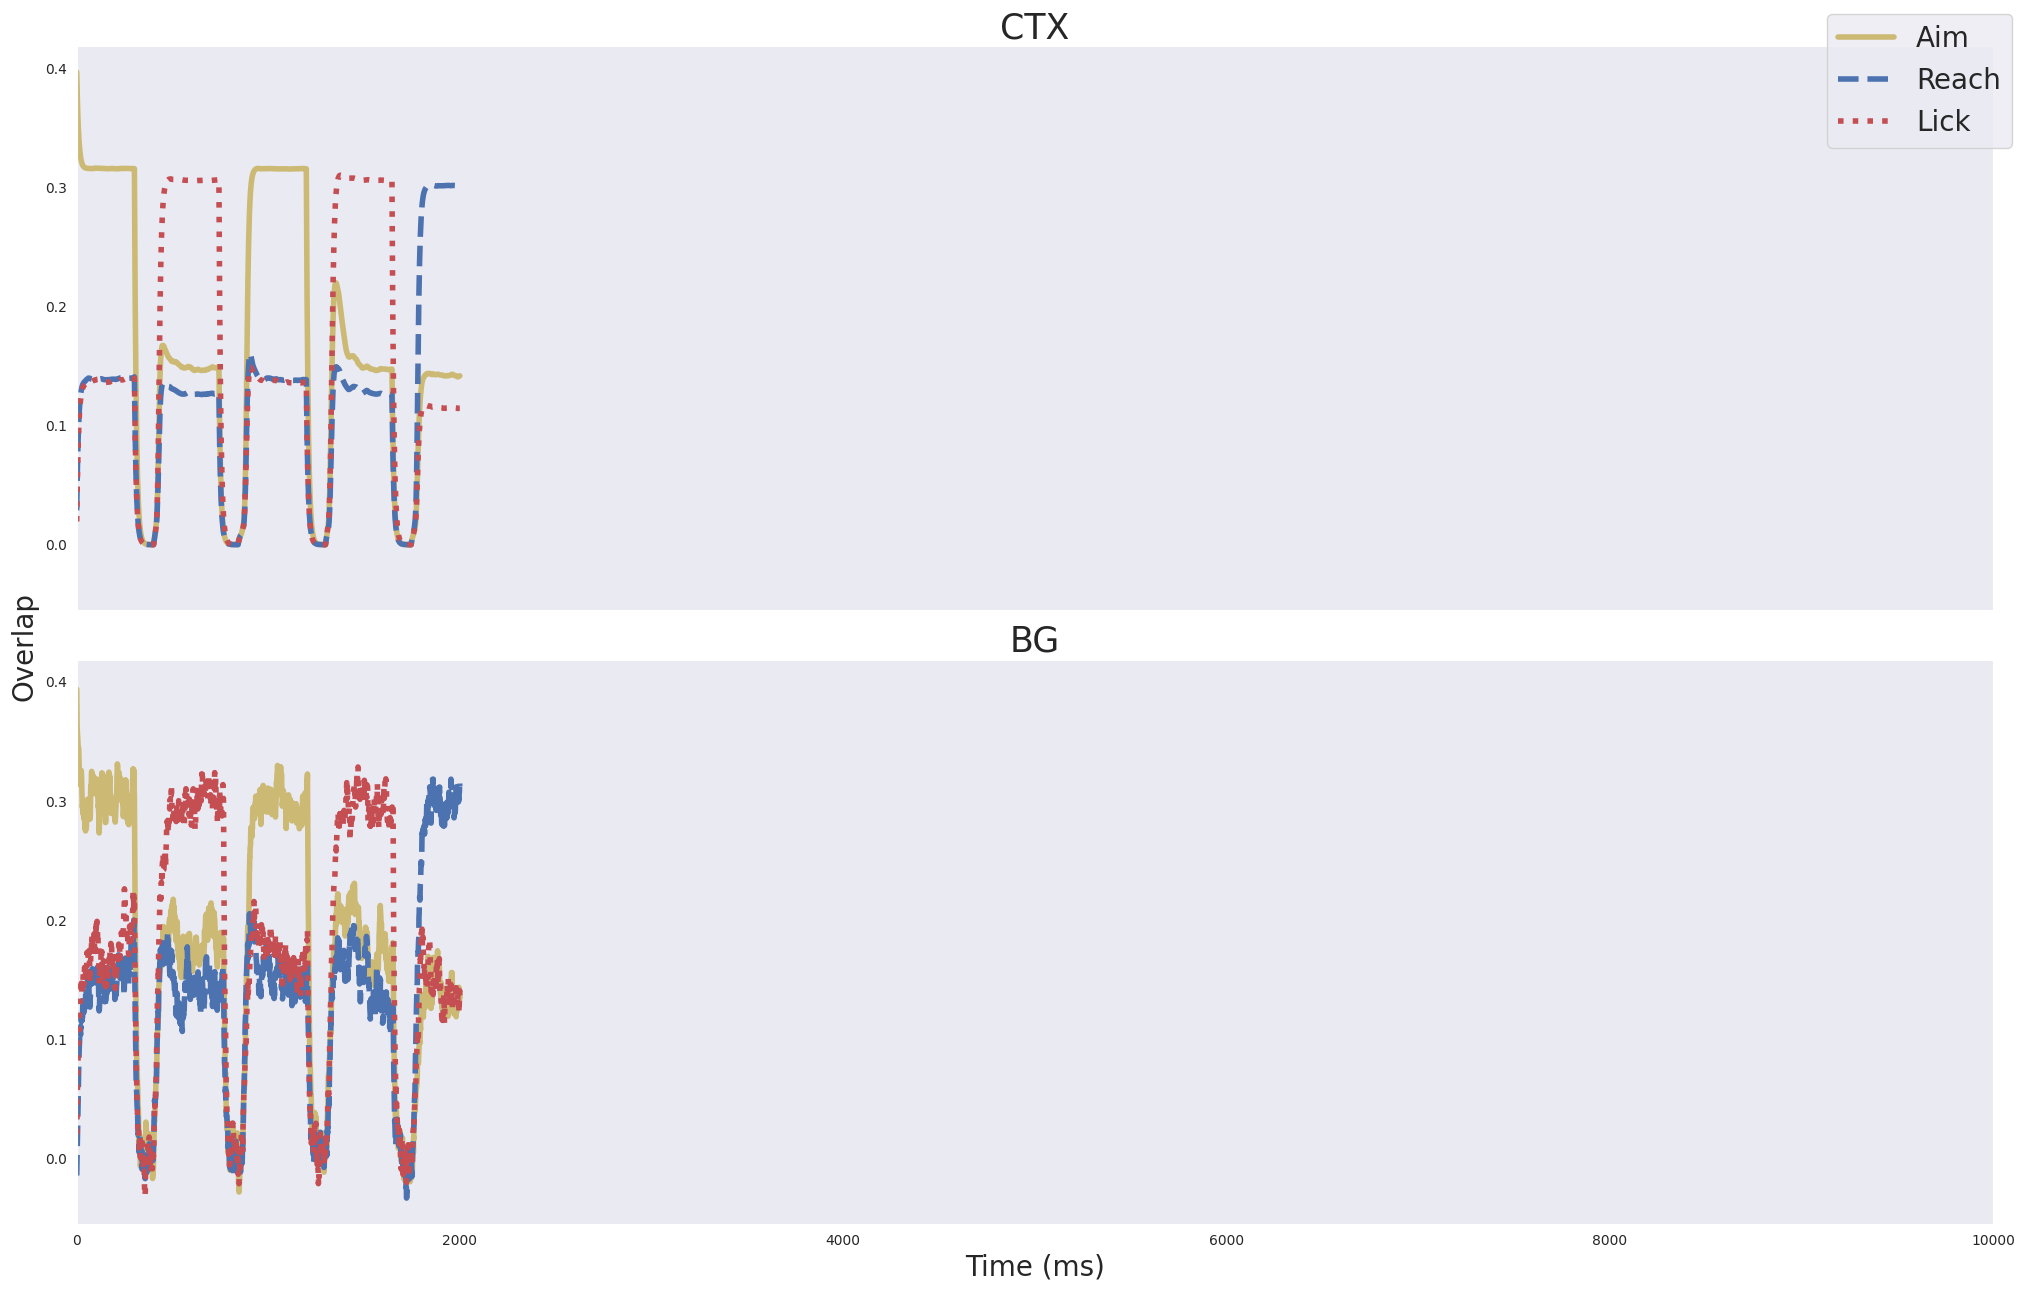

In [7]:
fig, axes = plt.subplots(2,1, sharex=True, sharey=True, tight_layout=True, figsize=(20,13))
axes[0].plot(overlaps_ctx[0], linestyle='solid', linewidth=4, color=colors[8])
axes[0].plot(overlaps_ctx[1], linestyle='dashed', linewidth=4, color=colors[0])
axes[0].plot(overlaps_ctx[2], linestyle='dotted', linewidth=4, color=colors[3])
axes[0].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[0].set_title("CTX", fontsize=25)
axes[1].plot(overlaps_bg[0], linestyle='solid', linewidth=4, color=colors[8])
axes[1].plot(overlaps_bg[1], linestyle='dashed', linewidth=4, color=colors[0])
axes[1].plot(overlaps_bg[2], linestyle='dotted', linewidth=4, color=colors[3])
axes[1].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[1].set_title("BG", fontsize=25)
axes[1].set_xlabel('Time (ms)', fontsize=20)
fig.text(-0.01, 0.5, 'Overlap', va='center', rotation='vertical', fontsize=20)
plt.setp(axes, xlim=(0, 10000))
plt.figlegend(labels=['Aim', 'Reach', 'Lick'], fontsize=20)
plt.show()
